## 3.2 Logistic Regression

Please start from [29]

In [1]:
import numpy as np
import pandas as pd
import os
import sqlalchemy as sqla
import sqlite3 as sql
from sqlite3 import Error
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_loc = os.getcwd()

In [3]:
file_loc

'C:\\Users\\Administrator\\1-STA208\\STA-208-project'

In [4]:
db1= sql.connect(file_loc+"\data1.db")
df1=pd.read_sql("SELECT * FROM loan",db1)
db2= sql.connect(file_loc+"\data2.db")
df2=pd.read_sql("SELECT * FROM loan",db2)
db3= sql.connect(file_loc+"\data3.db")
df3=pd.read_sql("SELECT * FROM loan",db3)
db4= sql.connect(file_loc+"\data4.db")
df4=pd.read_sql("SELECT * FROM loan",db4)
db5= sql.connect(file_loc+"\data5.db")
df5=pd.read_sql("SELECT * FROM loan",db5)
db6= sql.connect(file_loc+"\data6.db")
df6=pd.read_sql("SELECT * FROM loan",db6)
db7= sql.connect(file_loc+"\data7.db")
df7=pd.read_sql("SELECT * FROM loan",db7)
db8= sql.connect(file_loc+"\data8.db")
df8=pd.read_sql("SELECT * FROM loan",db8)
db9= sql.connect(file_loc+"\data9.db")
df9=pd.read_sql("SELECT * FROM loan",db9)
db10= sql.connect(file_loc+"\data10.db")
df10=pd.read_sql("SELECT * FROM loan",db10)
db11= sql.connect(file_loc+"\data11.db")
df11=pd.read_sql("SELECT * FROM loan",db11)
db12= sql.connect(file_loc+"\data12.db")
df12=pd.read_sql("SELECT * FROM loan",db12)

In [5]:
df = pd.DataFrame()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df = df.append(df9)
df = df.append(df10)
df = df.append(df11)
df = df.append(df12)
df.shape

(434407, 65)

In [6]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,17600,17600,17600,36 months,10.75%,574.12,B,B4,RENT,57109,...,6,0,1,95.1,1,0,88629,83563,2300,80329
1,12500,12500,12500,60 months,8.39%,255.8,B,B1,RENT,120000,...,9,0,1,100,0,0,80899,40673,48400,32499
2,10000,10000,10000,36 months,11.99%,332.1,C,C1,MORTGAGE,75000,...,9,0,2,100,0,1,71858,48844,0,60358
3,3000,3000,3000,36 months,7.39%,93.17,A,A4,RENT,80000,...,6,0,0,95,0,0,221908,25665,42200,30936
4,2000,2000,2000,36 months,6.49%,61.29,A,A2,RENT,90000,...,19,0,2,97.3,0,0,176338,68841,122100,48438


In [7]:
data = df.copy()

col_drop = ['grade','sub_grade','issue_d','earliest_cr_line','zip_code','collection_recovery_fee',
            'total_pymnt', 'total_pymnt_inv','last_credit_pull_d', 'funded_amnt','funded_amnt_inv','out_prncp_inv']
data = data.drop(col_drop, axis = 1)
data = data.reset_index(drop=True)

In [8]:
y_temp = data['loan_status']

In [9]:
# recode loan_status
y = y_temp.copy()
for i in range(len(y)):
    if (y_temp[i] == 'Fully Paid') or (y_temp[i] == 'Current'):
        y[i] = 'good'
    else:
        y[i] = 'bad'

In [10]:
y.head()

0    good
1    good
2    good
3    good
4    good
Name: loan_status, dtype: object

In [11]:
purpose_temp = data['purpose']

In [12]:
#recode purposes
purpose = purpose_temp.copy()
for i in range(len(purpose)):
    if (purpose_temp[i] == 'credit_card') or ( purpose_temp[i] == 'debt_consolidation') or (purpose_temp[i] == 'small_business') or (purpose_temp[i] == 'vacation') or (purpose_temp[i] == 'other'):
        purpose[i] = 'financial'
    elif purpose_temp[i] == 'medical':
        purpose[i] == 'medical'
    else:
        purpose[i] = 'property'

In [13]:
purpose.head()

0    financial
1    financial
2    financial
3    financial
4    financial
Name: purpose, dtype: object

In [14]:
addr_state_temp = data['addr_state']

In [15]:
#recode addr_state
addr_state = addr_state_temp.copy()
for i in range(len(y)):
    if addr_state_temp[i] == 'CA':
        addr_state[i] = 'CA'
    else:
        addr_state[i] = 'other'

In [16]:
addr_state.head()

0    other
1    other
2    other
3    other
4    other
Name: addr_state, dtype: object

In [17]:
verification_status_temp = data['verification_status']

In [18]:
#recode addr_state
verification_status = verification_status_temp.copy()
for i in range(len(y)):
    if verification_status_temp[i] == 'Not Verified':
        verification_status[i] = 'not verified'
    else:
        verification_status[i] = 'verified'

In [19]:
verification_status.head()

0        verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verification_status, dtype: object

In [20]:
#Create dummy variables
dummy1 = pd.get_dummies(y)
dummy2 = pd.get_dummies(purpose)
dummy3 = pd.get_dummies(addr_state)
dummy4 = pd.get_dummies(data['term'])
dummy5 = pd.get_dummies(data['home_ownership'])
dummy6 = pd.get_dummies(verification_status)
dummy7 = pd.get_dummies(data['initial_list_status'])
dummy8 = pd.get_dummies(data['application_type'])

In [21]:
data_category = ['loan_status','verification_status','addr_state', 'term', 'initial_list_status',
                 'application_type','financial','property','MORTGAGE','OWN','RENT']

In [22]:
#Insert dummy variables into dataset
data['loan_status'] = dummy1['good']
data['addr_state'] = dummy3['CA']
data['term'] = dummy4[' 36 months']
data['verification_status'] = dummy6['verified']
data['initial_list_status'] = dummy7['w']
data['application_type'] = dummy8['Individual']

data = data.drop(['purpose','home_ownership'], axis = 1)
data = pd.concat([data, dummy2.iloc[:,[0,2]],dummy5.iloc[:,1:4]],axis = 1)

# convert all data as float
data['int_rate'] = [x[:-1] for x in data['int_rate']]
data = data.astype(float)
data['int_rate'] = data['int_rate']/100

data.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,addr_state,delinq_2yrs,open_acc,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,financial,property,MORTGAGE,OWN,RENT
0,17600.0,1.0,0.1075,574.12,57109.0,1.0,1.0,0.0,0.0,6.0,...,0.0,88629.0,83563.0,2300.0,80329.0,1.0,0.0,0.0,0.0,1.0
1,12500.0,0.0,0.0839,255.80,120000.0,0.0,1.0,0.0,0.0,9.0,...,0.0,80899.0,40673.0,48400.0,32499.0,1.0,0.0,0.0,0.0,1.0
2,10000.0,1.0,0.1199,332.10,75000.0,0.0,1.0,0.0,0.0,9.0,...,1.0,71858.0,48844.0,0.0,60358.0,1.0,0.0,1.0,0.0,0.0
3,3000.0,1.0,0.0739,93.17,80000.0,0.0,1.0,0.0,1.0,6.0,...,0.0,221908.0,25665.0,42200.0,30936.0,1.0,0.0,0.0,0.0,1.0
4,2000.0,1.0,0.0649,61.29,90000.0,0.0,1.0,0.0,0.0,19.0,...,0.0,176338.0,68841.0,122100.0,48438.0,1.0,0.0,0.0,0.0,1.0


In [23]:
data_lasso = data.copy()

In [24]:
from  sklearn.preprocessing  import scale
data_lasso[data.columns[~data_lasso.columns.isin(data_category)]]=scale(data_lasso[data.columns[~data_lasso.columns.isin(data_category)]])

In [25]:
X = data_lasso[data_lasso.columns.difference(['loan_status'])].values
y = data_lasso.loc[:, 'loan_status'].values
X=X.astype(float)

In [26]:
selected_X_0 = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'num_bc_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0',
       'num_tl_op_past_12m', 'total_bc_limit', 'financial', 'property',
       'MORTGAGE']

In [27]:
data_fnl = pd.concat([data_lasso[selected_X_0], data_lasso['loan_status']],axis = 1)

In [28]:
### training and test set split
#Split the data into training set(75% of data) and testing set(25% of data)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_fnl, test_size = 0.25, random_state = 0)

## get the train and test data set
X_tr = train[train.columns.difference(['loan_status'])].values
y_tr = train.loc[:, 'loan_status'].values

X_te = test[test.columns.difference(['loan_status'])].values
y_te = test.loc[:, 'loan_status'].values

__Logistic Regression:__

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
data_fnl['loan_status'].value_counts()

1.0    376807
0.0     57600
Name: loan_status, dtype: int64

In [31]:
data_fnl.groupby('loan_status').mean()

,loan_amnt,term,int_rate,annual_inc,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,num_bc_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_tl_op_past_12m,total_bc_limit,financial,property,MORTGAGE
loan_status,,,,,,,,,,,,,,,,,,
0.0,0.102077,0.680000,0.566207,-0.077200,-0.427362,-0.681931,-0.024150,0.399684,1.085877,-0.454225,-0.008852,0.055567,0.096176,0.245521,-0.163191,0.877049,0.108819,0.416059
1.0,-0.015604,0.754569,-0.086552,0.011801,0.065328,0.104242,0.003692,-0.061097,-0.165991,0.069434,0.001353,-0.008494,-0.014702,-0.037531,0.024946,0.866521,0.121203,0.497738


In [32]:
logreg=LogisticRegression()
logreg.fit(X_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred = logreg.predict(X_te)

In [34]:
print('Accuracy of logistic regression classifier on test set: {:.10f}'.format(logreg.score(X_te, y_te)))

Accuracy of logistic regression classifier on test set: 0.9691994623


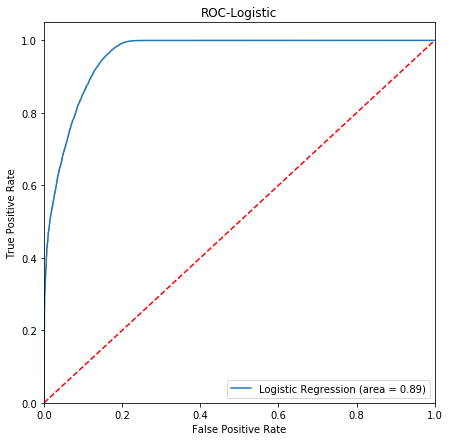

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_te, logreg.predict(X_te))
fpr, tpr, thresholds = roc_curve(y_te, logreg.predict_proba(X_te)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Logistic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [36]:
logreg.coef_[0]

array([ 1.77979972e-01,  1.16863094e-01, -1.14635463e-03, -4.92512672e-01,
        2.61317963e+00, -2.15815093e+01, -1.03323370e-01,  2.33727511e-02,
       -6.56854653e-02, -1.58208048e-01,  1.40374288e+01,  8.03396882e-02,
       -8.93771991e+00, -1.02821904e+00,  2.71605009e-01,  4.64739158e-01,
       -4.05125775e-01,  1.78575184e+01])

In [42]:
dict(zip(selected_X_0,logreg.coef_[0]))

{'MORTGAGE': 17.857518384054224,
 'annual_inc': -0.49251267201029564,
 'financial': 0.46473915800571614,
 'int_rate': -0.0011463546316327726,
 'last_pymnt_amnt': -0.15820804786649886,
 'loan_amnt': 0.17797997217815037,
 'num_bc_tl': 14.037428762421504,
 'num_op_rev_tl': 0.08033968819957353,
 'num_rev_tl_bal_gt_0': -8.937719914413456,
 'num_tl_op_past_12m': -1.0282190378203246,
 'out_prncp': 2.613179632642038,
 'property': -0.4051257753492343,
 'recoveries': -0.06568546525045943,
 'term': 0.11686309370611886,
 'total_bc_limit': 0.2716050091951701,
 'total_rec_int': -0.10332336963645032,
 'total_rec_late_fee': 0.023372751061055717,
 'total_rec_prncp': -21.581509295494012}

From the above output, the accuracy rate of it is $0.9691994623$, the ROC area is $0.89$, which shows that logistic regression is an adequate model here.

Based on the coefficients of all X variables, we can find that __num_bc_tl__, __total_rec_prncp__, __MORTGAGE__ play important roles in the logistic regression.

Therefore, we can conclude that principal received to date, total number of bank accounts and the home ownership status are the critical part that investors should focus on in a loan contract.

### prediction in reality

In [36]:
import numpy as np
import pandas as pd
import os
import sqlalchemy as sqla
import sqlite3 as sql
from sqlite3 import Error
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
file_loc = os.getcwd()

In [38]:
db= sql.connect(file_loc+"\data_pred.db")
df_pred=pd.read_sql("SELECT * FROM pred",db)

In [41]:
X_pred = df_pred.drop(['loan_status'], axis = 1).values
y_pred_real = logreg.predict(X_pred)

In [42]:
sum(y_pred_real == 1)/len(y_pred_real)

0.7582729359572876

Based on the logistic regression, the prediction of loans issued at March 2018 shows that around $75%$ loans can be paid off in the future.